<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%94%D0%97_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [4]:
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак
* аналіз категоріальних ознак
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [5]:
df['pclass'] = df['pclass'].astype('str')

In [ ]:
df.describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include = 'object')

,pclass,sex,embarked
count,891,891,889
unique,3,2,3
top,3,male,S
freq,491,577,644


<Axes: >

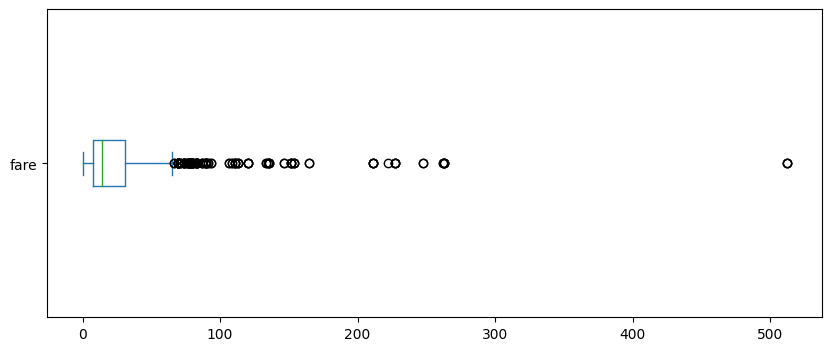

In [ ]:
df['fare'].plot(kind='box', vert=False, figsize=(10,4))

In [6]:
column = df['fare']

q1 = column.quantile(q=0.25)
q3 = column.quantile(q=0.75)

iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

mask = (column >= lower) & (column <= upper)
df = df[mask]
df.shape

(775, 7)

<Axes: >

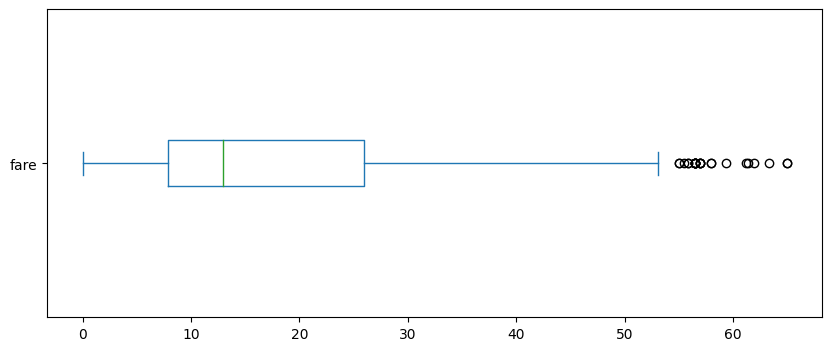

In [ ]:
df['fare'].plot(kind='box', vert=False, figsize=(10,4))

<Axes: >

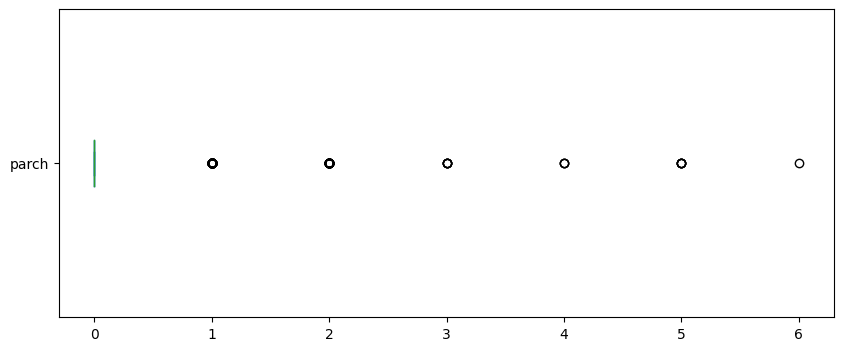

In [ ]:
df['parch'].plot(kind='box', vert=False, figsize=(10,4))

In [ ]:
df[df['parch'] !=0 ]['parch'].count()

166

In [7]:
df[df['sibsp'] !=0 ]['sibsp'].count()

218

In [ ]:
corr = df.select_dtypes(include='number').corr(method='pearson')
corr

,age,sibsp,parch,fare
age,1.000000,-0.358297,-0.217333,0.090865
sibsp,-0.358297,1.000000,0.410182,0.370388
parch,-0.217333,0.410182,1.000000,0.336844
fare,0.090865,0.370388,0.336844,1.000000


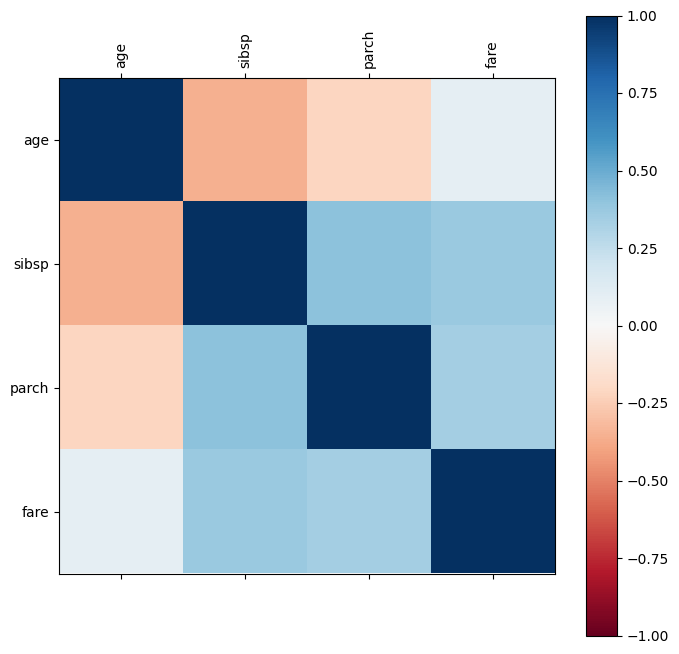

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

plt.colorbar()
plt.clim(-1, 1)

In [ ]:
corr = df.select_dtypes(include='number').corr(method='spearman')
corr

,age,sibsp,parch,fare
age,1.000000,-0.242402,-0.310423,0.083039
sibsp,-0.242402,1.000000,0.477022,0.458402
parch,-0.310423,0.477022,1.000000,0.435271
fare,0.083039,0.458402,0.435271,1.000000


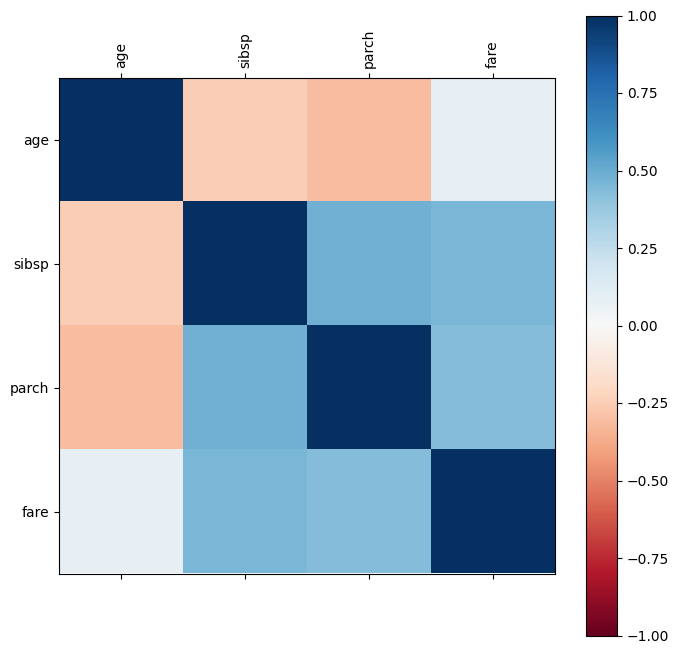

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

plt.colorbar()
plt.clim(-1, 1)

In [ ]:
Не виявлено значної кореляції між числовими характеристиками. Тобто ціна за порож не залежить від віку пасажира та кількості дітей/батьків на борту.

Text(0, 0.5, 'fare')

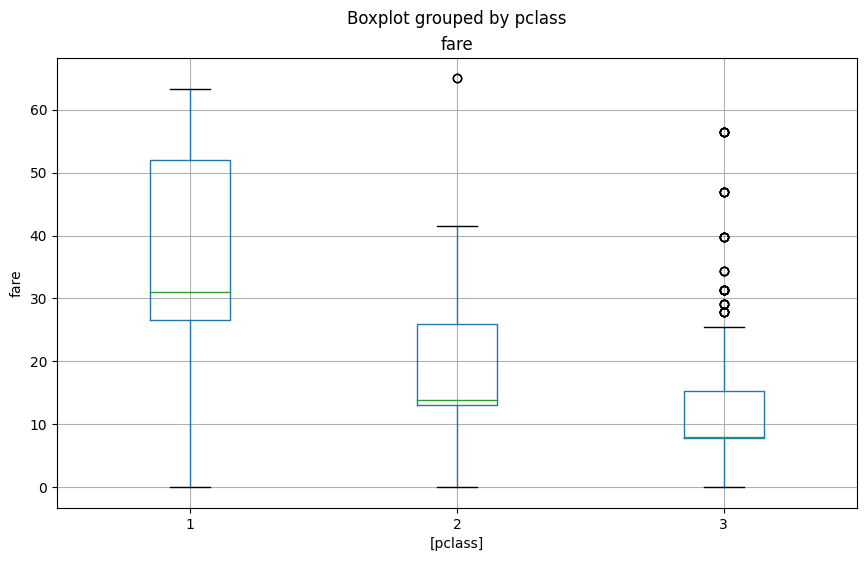

In [ ]:
ax = df[['pclass', 'fare']].boxplot(by='pclass', figsize=(10,6))
ax.set_ylabel('fare')

In [ ]:
На графіку бачимо, що для різних класів китків відрізняється медіана вартості подорожі.

Text(0, 0.5, 'fare')

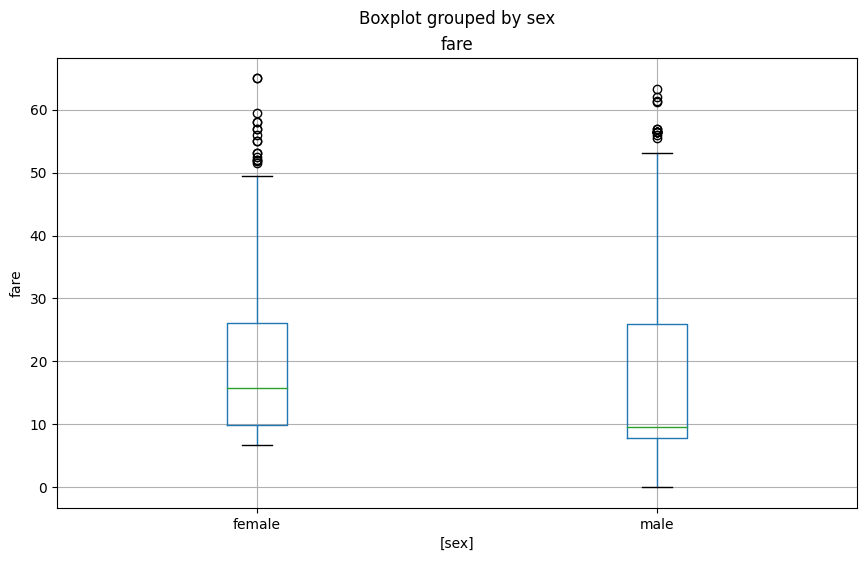

In [ ]:
ax = df[['sex', 'fare']].boxplot(by='sex', figsize=(10,6))
ax.set_ylabel('fare')

In [ ]:
Можна сказати, що стать не має значного впливу на вартість подорожі, бо ящики приблизно в однаковому діапазоні.
Трохи відрізняється медіана, можна зробити припущення, що жінки частіше обирають більш високий клас квитків (перший, другий).

Text(0, 0.5, 'age')

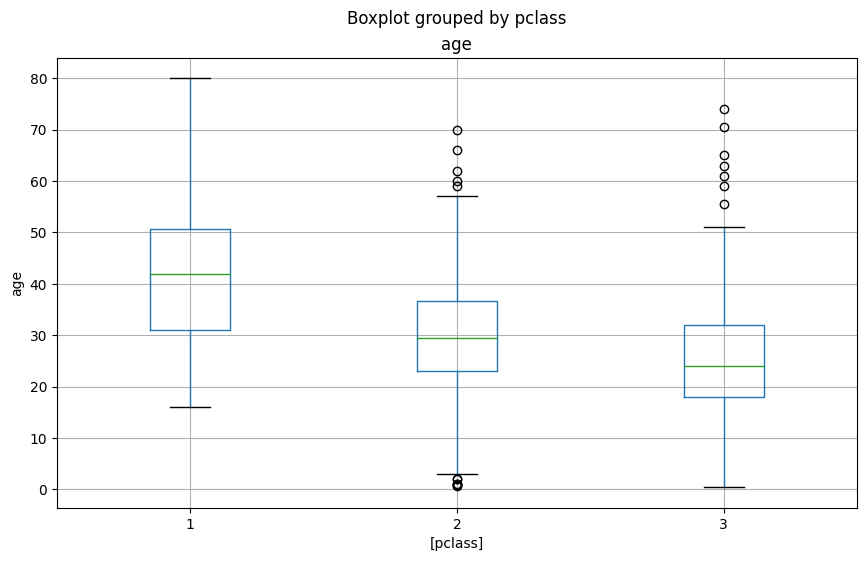

In [ ]:
ax = df[['pclass', 'age']].boxplot(by='pclass', figsize=(10,6))
ax.set_ylabel('age')

In [ ]:
Можна зробити висновок, що пасажири середнього віку (30 +) частіше віддають перевагу подорожам в першому класі.
Також бачимо, що в першому класі майже не має пасажирів віком до 20 років. Ця вікова категорія обирає подорожі в другому/третьому класі.

Text(0, 0.5, 'sibsp')

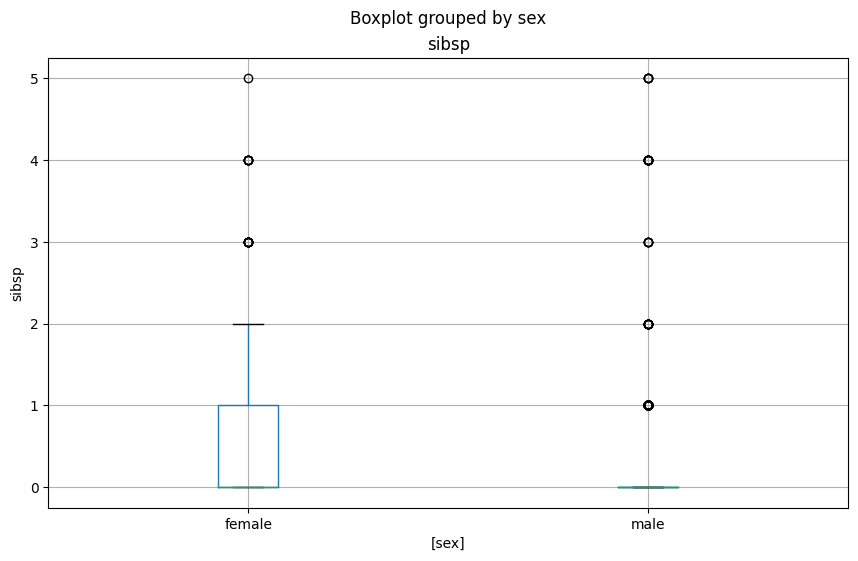

In [ ]:
ax = df[['sex', 'sibsp']].boxplot(by='sex', figsize=(10,6))
ax.set_ylabel('sibsp')

In [ ]:
Графік в розрізі кількості батьків/сестер та статі пасажира не є інформативним. Можливо жінки трохи частіше подорожують з родичами.

Text(0, 0.5, 'parch')

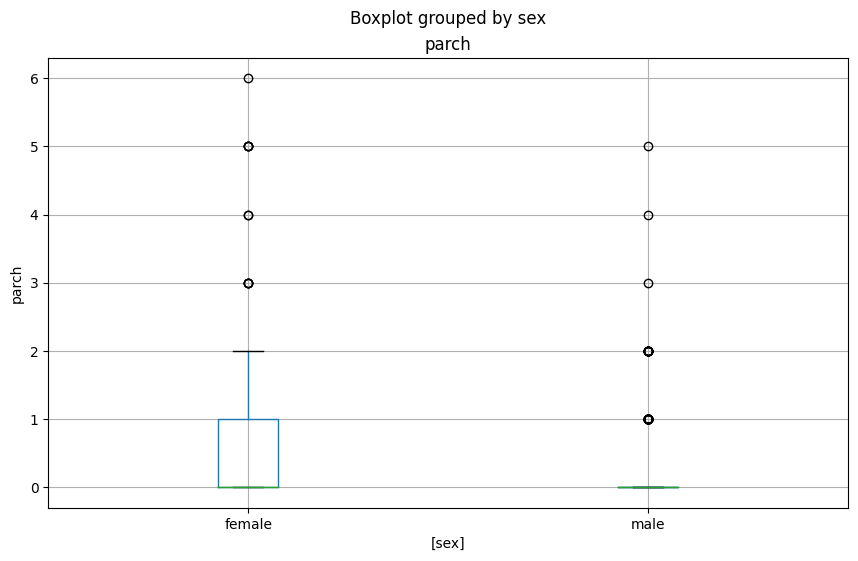

In [ ]:
ax = df[['sex', 'parch']].boxplot(by='sex', figsize=(10,6))
ax.set_ylabel('parch')

In [ ]:
Аналогічно з графіком в розрізі кількості дітей і статі пасажира.

Text(0, 0.5, 'parch')

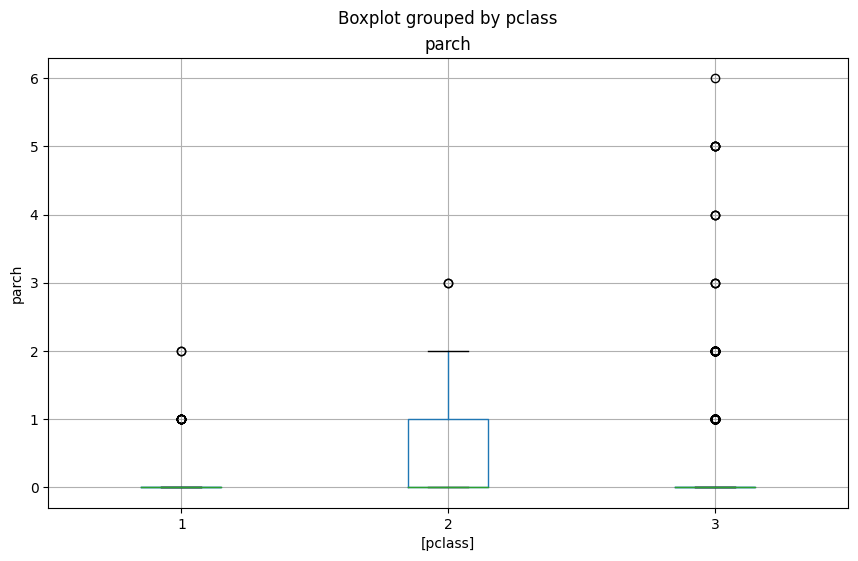

In [ ]:
ax = df[['pclass', 'parch']].boxplot(by='pclass', figsize=(10,6))
ax.set_ylabel('parch')

In [ ]:
Можна визначити, що діти частіше подорожують в другому класі.

Text(0, 0.5, 'fare')

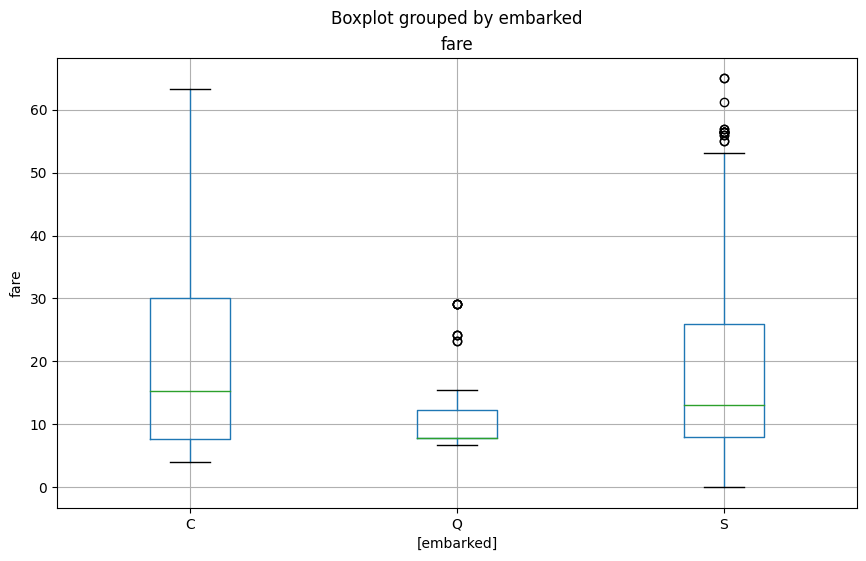

In [ ]:
ax = df[['embarked', 'fare']].boxplot(by='embarked', figsize=(10,6))
ax.set_ylabel('fare')

Text(0, 0.5, 'age')

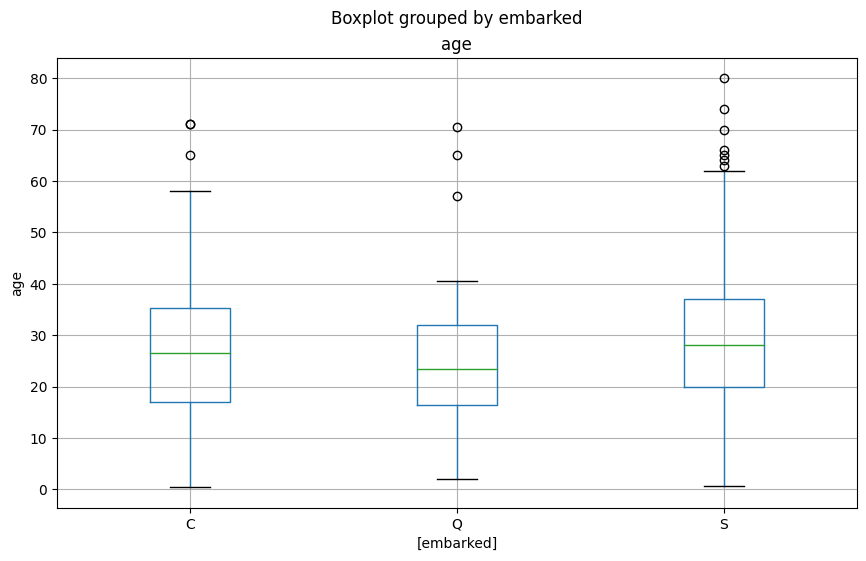

In [ ]:
ax = df[['embarked', 'age']].boxplot(by='embarked', figsize=(10,6))
ax.set_ylabel('age')